In [70]:
#### First, you should import libraires.
#### 

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
### for the color
import termcolor
todo=termcolor.colored('TO DO', color='red')

In [71]:
# I - Data reading & splitting

from keras.datasets import mnist

# 1) load data from MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# Input image format
rows, cols, channels = 28,28,1
# 2) What does "x_train", "y_train", "x_test" and "y_test" present ?
# 3) Reshape "x_train" and "x_test" according to the input image format
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#4)Display the number of images in train and test sets
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


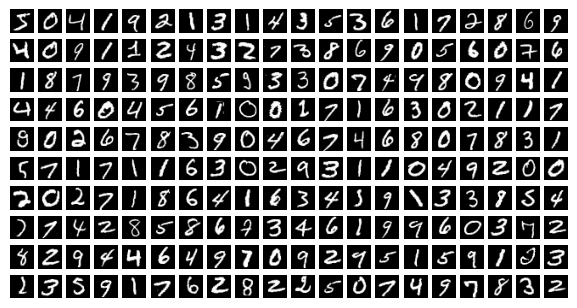

In [72]:
# II - Data visualisation

#1) Which library is required to  display images
import matplotlib.pyplot as plt

#2) Complete the script to display the first 200 images from the MNIST dataset

plt.figure(figsize=(7.195, 3.841), dpi=100)

for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(x_train[i].reshape([28,28]), cmap='gray')
    plt.axis('off')


In [59]:
#III - Model Architecture 
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_12 (Flatten)        (None, 9216)              0         
                                                                 
 dense_23 (Dense)            (None, 128)               1179776   
                                                     

In [29]:
# IV - Fiting
    
# 1) convert labels to categorical type
from keras.utils import np_utils
num_classes=10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# 2) complete the following command to fit the Deep neural model.
# 3) select the hyperparameters values

# 4) What does each hyperparameter presents

model_log=model.fit(x_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_split=0.3
)

Epoch 1/50
329/329 [==============================] - 5s 12ms/step - loss: 2.2880 - accuracy: 0.1211 - val_loss: 2.2486 - val_accuracy: 0.2119
Epoch 2/50
329/329 [==============================] - 4s 11ms/step - loss: 2.2355 - accuracy: 0.1981 - val_loss: 2.1918 - val_accuracy: 0.3911
Epoch 3/50
329/329 [==============================] - 4s 11ms/step - loss: 2.1817 - accuracy: 0.2777 - val_loss: 2.1295 - val_accuracy: 0.5065
Epoch 4/50
329/329 [==============================] - 4s 11ms/step - loss: 2.1185 - accuracy: 0.3515 - val_loss: 2.0549 - val_accuracy: 0.5949
Epoch 5/50
329/329 [==============================] - 4s 11ms/step - loss: 2.0434 - accuracy: 0.4171 - val_loss: 1.9642 - val_accuracy: 0.6446
Epoch 6/50
329/329 [==============================] - 3s 11ms/step - loss: 1.9553 - accuracy: 0.4720 - val_loss: 1.8560 - val_accuracy: 0.6824
Epoch 7/50
329/329 [==============================] - 4s 11ms/step - loss: 1.8522 - accuracy: 0.5141 - val_loss: 1.7311 - val_accuracy: 0.7129

In [30]:
# V - Evaluate the model

# 1) complete the command to evaluate the model 

score, acc = model.evaluate(x_test, y_test)

# 2) complete the command to display model performance

print('Test loss:', score)
print('Test accuracy:',acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.9069
Test loss: 0.3316735625267029
Test accuracy: 0.9068999886512756


In [31]:
import numpy as np
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

In [32]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[ 959    0    2    3    0    1    7    1    7    0]
 [   0 1114    3    4    1    1    4    0    8    0]
 [  17    1  902   12   15    0   22   22   41    0]
 [   4    2   21  911    0   22    3   14   23   10]
 [   1    6    5    0  885    0   20    2    6   57]
 [  19    3    3   63   11  723   21    2   37   10]
 [  17    6    4    1   12   18  897    1    2    0]
 [   1   19   25    2   13    0    0  923    4   41]
 [  11   14    9   26    7   20   10   19  849    9]
 [  14    9    5   13   28    5    0   23    6  906]]


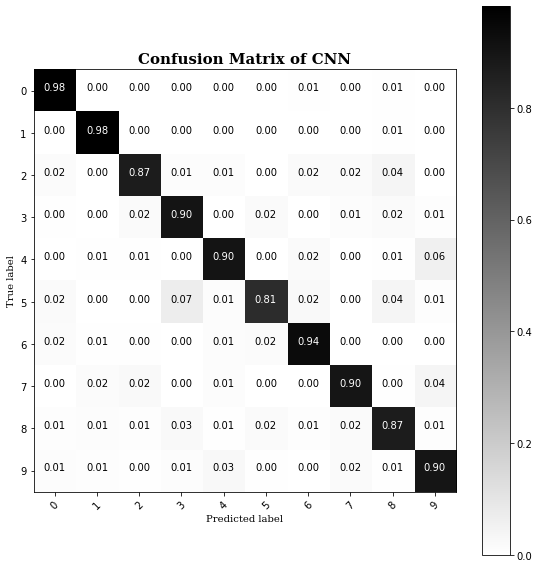

In [33]:
# Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN')

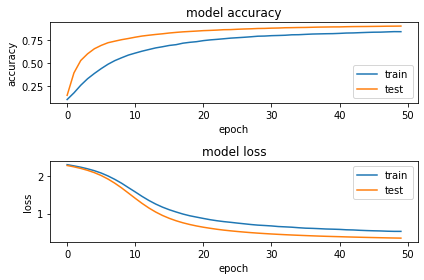

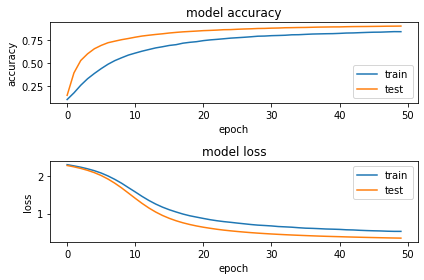

In [13]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [65]:
# VI - Create a new model and evaluate its performance
from keras.utils import np_utils
num_classes=10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

import tensorflow
def New_model():
    # 1) create model
    model = Sequential()
    model.add(Conv2D(30, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    model.summary()
    return model


# 2) Model evaluation
# build the model
model = New_model()
# Fit the model
model_log=model.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=128)
# Final evaluation of the model
score= model.evaluate(x_test, y_test, verbose=0)
print("New Model Error: %.2f%%" % (100-score[1]*100))
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 15)         0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 5, 5, 15)          0         
                                                                 
 flatten_15 (Flatten)        (None, 375)             

In [66]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[ 908    1    2    1    3   14   41    7    3    0]
 [   0 1027   64    3    1    0   37    0    2    1]
 [  18    7  879   32   11    0   33   22   29    1]
 [   8   10   28  751    3    0   85   36   85    4]
 [   3    3    3    0  781    0   37    3   13  139]
 [  92   32    1   51   52  346  164   40   92   22]
 [  47   22   71    1   19    7  788    0    1    2]
 [   7   16   36    2   65    0    4  758   51   89]
 [  18   19   19  106   14    9   44   38  703    4]
 [  15    4    2    7  189    0    0   61   54  677]]


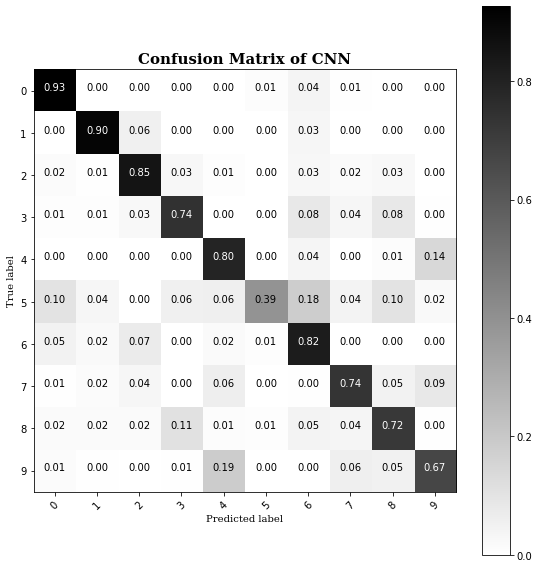

In [67]:
# Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN')

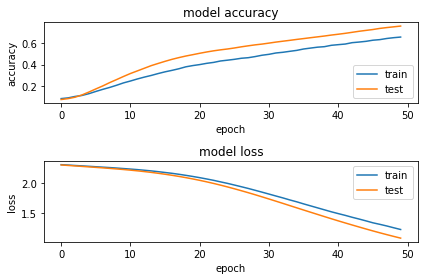

In [68]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()


In [73]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils import np_utils
num_classes=10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# VI - Create a new model and evaluate its performance
def New_model():
    # 1) create model

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

# 2) Model evaluation
# build the model
model = New_model()
# Fit the model
model_log=model.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=128)
# Final evaluation of the model
score= model.evaluate(x_test, y_test, verbose=0)
print("New Model Error: %.2f%%" % (100-score[1]*100))
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 conv2d_41 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 10, 10, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_27 (Dropout)        (None, 10, 10, 64)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 6, 6, 64)        

In [74]:
import numpy as np
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[ 947    1    0    1    2    0   21    4    4    0]
 [   0 1122    2    5    0    0    3    0    2    1]
 [   7   13  875   38   21    3   18   34   19    4]
 [   3    1    4  944    2   20    0   16   16    4]
 [   1    6    1    0  949    0   10    1    1   13]
 [   8    6    0   23    0  814   21    7   10    3]
 [   9    5    1    2    4   11  924    0    2    0]
 [   4   18   19    2   16    0    0  952    3   14]
 [   8    3    1   19    9    7   11   12  888   16]
 [  10    6    1    9   43    6    4   21   15  894]]


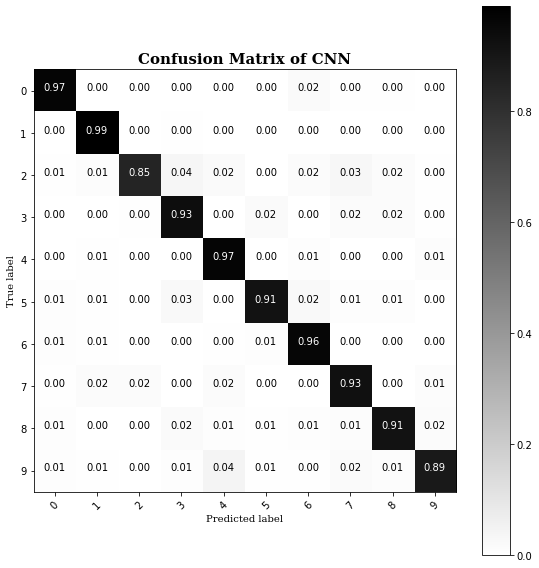

In [75]:
# Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN')

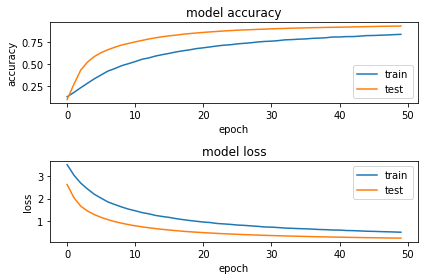

In [76]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [42]:
from re import VERBOSE
import tensorflow
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils import np_utils
num_classes=10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# VI - Create a new model and evaluate its performance
def New_model():
    # 1) create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(7,7),
                 padding='valid',
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(Conv2D(128, (7, 7), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (7, 7), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

# 2) Model evaluation
# build the model
model = New_model()
# Fit the model
model_log=model.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=128,verbose=1)
# Final evaluation of the model
score= model.evaluate(x_test, y_test, verbose=0)
print("New Model Error: %.2f%%" % (100-score[1]*100))
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 22, 22, 32)        1600      
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       200832    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 8, 8, 128)        512       
 hNormalization)                                                 
                                                                 
 dropout_14 (Dropout)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 2, 2, 64)         

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[ 966    0    4    0    0    0    2    2    6    0]
 [   0 1125    4    3    0    0    1    0    2    0]
 [   4    2  994    2    3    0    1    9   17    0]
 [   1    1   16  956    0    6    0    7   20    3]
 [   1    5    4    0  914    0    7    1   19   31]
 [   9    3    4   12    0  837    5    3   18    1]
 [  10    5    5    0    4    1  924    0    9    0]
 [   2   13   40    1    0    1    1  954    7    9]
 [   3    0    2    1    2    0    0    3  962    1]
 [   8    5    2    2    3    4    1    8   19  957]]


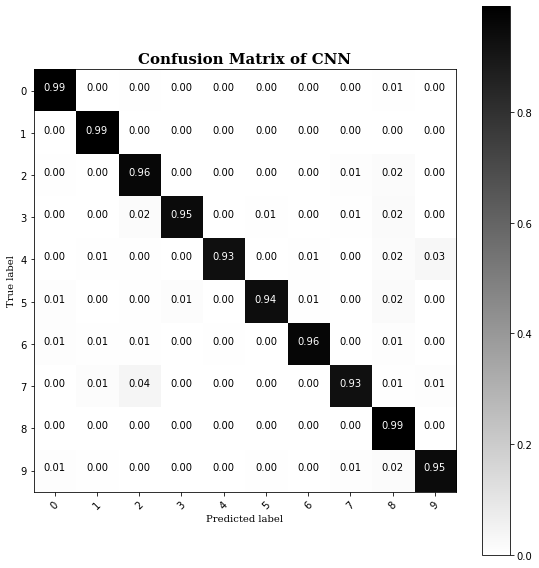

In [44]:
# Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN')

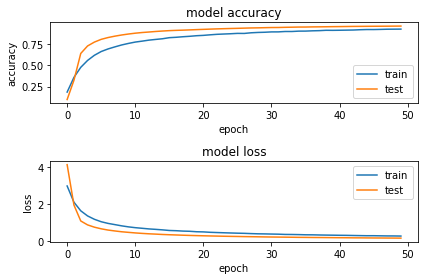

In [45]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()